In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
import numpy as np
import random
import string 
import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
text_data = open('/content/drive/My Drive/breast_cancer/breast_cancer.txt','r',errors = 'ignore')
raw_data = text_data.read()
raw_data = raw_data.lower()# converts to lowercase
nltk.download('punkt') 
nltk.download('wordnet') 
sent_tokens = nltk.sent_tokenize(raw_data)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw_data)# converts to list of words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
raw_data

'breast cancer is a disease in which cells in the breast grow out of control. there are different kinds of breast cancer. the kind of breast cancer depends on which cells in the breast turn into cancer\nthe incidence of breast cancer is increasing in the developing world due to increasing life expectancy, increased urbanization, and adopting western lifestyles.\nkind of cancer:-\ninvasive ductal carcinoma.--the cancer cells grow outside the ducts into other parts of the breast tissue. invasive cancer cells can also spread, or metastasize, to other parts of the body.\ninvasive lobular carcinoma.--cancer cells spread from the lobules to the breast tissues that are close by. these invasive cancer cells can also spread to other parts of the body.\n\nsymptoms of breast cancer\n1.new lump in the breast or underarm (armpit).\n2.thickening or swelling of part of the breast.\n3.irritation or dimpling of breast skin.\n4.redness or flaky skin in the nipple area or the breast.\n5.pulling in of the

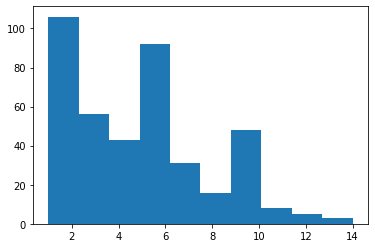

In [5]:
from matplotlib import pyplot as plt  #line 1
test = word_tokenize(raw_data)
word_len = [len(length) for length in test]
plt.hist(word_len)
plt.show()

In [6]:
sent_tokens[:2]


['breast cancer is a disease in which cells in the breast grow out of control.',
 'there are different kinds of breast cancer.']

In [7]:
word_tokens[:2]

['breast', 'cancer']

In [8]:
print(set(sent_tokenize(raw_data)))

{'symptoms of breast cancer\n1.new lump in the breast or underarm (armpit).', 'invasive cancer cells can also spread, or metastasize, to other parts of the body.', '4.redness or flaky skin in the nipple area or the breast.', '6.nipple discharge is other than breast milk, including blood.', 'there are two early detection methods:\n-early diagnosis or awareness of early signs and symptoms in symptomatic populations in order to facilitate diagnosis and early treatment, and\n-screening that is the systematic application of a screening test in a presumably asymptomatic population.', 'it aims to identify individuals with an abnormality suggestive of cancer.', '2.thickening or swelling of part of the breast.', 'breast cancer can be treated by-\n*surgery\n*chemotherapy\n*hormonal therapy\n*biological therapy\n*radiation therapy', 'the kind of breast cancer depends on which cells in the breast turn into cancer\nthe incidence of breast cancer is increasing in the developing world due to increasi

In [9]:
print(set(word_tokenize(raw_data)))

{'more', 'lump', '8.pain', '-eat', 'are', 'healthy', 'alcohol', 'through', 'parts', 'risk', 'ultraviolet', 'presumably', 'be', 'early', 'an', 'medical', 'is', 'signs', 'treatment', 'it', 'people', 'countries', 'symptoms', 'facilitate', 'following', 'by-', 'by', '1.new', 'ionizing', 'western', 'avoiding', 'smoke', 'care', ':', 'order', 'control', 'two', 'develop', 'due', '*radiation', 'populations', 'cancer', '4.redness', 'invasive', 'urbanization', 'human', 'outside', 'other', 'area', 'aims', 'prevent', 'underarm', 'vegetables', 'against', 'developing', 'swelling', 'systematic', 'nipple', '-avoid', '*surgery', '3.irritation', 'weight', 'close', 'ductal', 'carcinoma.', '-', '-reduce', 'low-', 'milk', 'expectancy', 'sex', 'kinds', 'tobacco', 'life', 'flaky', '*hormonal', 'cells', 'also', 'application', 'safe', 'hpv', ',', 'depends', 'that', 'from', '6.nipple', 'can', '*chemotherapy', 'breast', 'suggestive', 'middle-income', 'in', 'grow', 'and', 'size', 'therapy', 'to', 'with', 'spread', 

In [10]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [12]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
def response(user_response):
    Meera_response = ''
    TfidfVec = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf == 0):
        Meera_response = Meera_response + "I am sorry! I don't understand you"
        return Meera_response
    else:
        Meera_response = Meera_response+sent_tokens[idx]
        return Meera_response

In [16]:
Continue = True
print("Meera: My name is Meera. I will answer your queries. If you want to exit, type Bye!")
while(Continue == True):
    user_response = input()
    user_response = user_response.lower()
    if(user_response !='bye'):
        if(user_response =='thanks' or user_response =='thank you' ):
            Continue = False
            print("Meera: You are welcome..")
        else:
            if(greeting(user_response) != None):
                print("Meera: " + greeting(user_response))
            else:
                sent_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)
                final_words=list(set(word_tokens))
                print("Meera: ",end = "")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        Continue=False
        print("Meera: Bye! take care..")

Meera: My name is Meera. I will answer your queries. If you want to exit, type Bye!
what is breast cancer
Meera: breast cancer is a disease in which cells in the breast grow out of control.
bye
Meera: Bye! take care..
